# Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


So here we see in walmart_data csv file we have 5,50,068 data rows where in problem statement it is given that walmart has 100 million customers hence the data we have is a sample of original data(population). Other than that we get to know what columns we have which are (user_id, product_id, gender, age, occupation, city_category, stay_in_current_city_years, marital_status, product_category, purchase) among these user_id, occupation, marital_status, product_category, purchase are numerical variables else are categorical.
Number of columns = 10

In [4]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

there are no null values in the sample data we have been provided

In [5]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


from here we get to know descriptive stats about each columns in our data
such as
1. For column User_ID: Mean is 1003029, Standard Deviation is 1727.592, Minimum is 1000001, 25th percentile is 1001516, 50th percentile is 1003077, 75th percentile is 1004478 and Maximum is 1006040 which shows that in this sample we have data of user id's in range 1000001 to 1006040

2. For column Product_ID: Unique values are 3631, Most frequent product_id is P00265242 which is in 1880 rows out of 550068 which shows it is the most frequent purchased item in Black Friday Sale

3. For column Gender: Unique values are 2, Most frequent gender is Male which is in 414259 rows out of 550068 which shows mostly Male made purchases in Black Friday Sale

4. For column Age: Unique values are 7, Most frequent age range is 26-35 which is in 219587 rows out of 550068 which shows customers of age 26 to 35 made most purchases on Black Friday Sale

5. For column Occupation: Mean is 8.076707, Standard Deviation is 6.522660, Minimum is 0.000000, 25th percentile is 2.000000, 50th percentile is 7.000000, 75th percentile is 14.000000 and Maximum is 20.000000 which shows that our customers have occupation in range 0 to 20

6. For column City_Category: Unique values are 3, Most frequent City_Category is B which is in 231173 rows out of 550068 which shows customers from city_category B are the one who made most purchases on Black Friday Sale

7. For column Stay_In_Current_City_Years: Unique values are 5, Most frequent Stay_In_Current_City_Years is 1 which is in 193821 rows out of 550068 which shows customers who stay in current city for about 1 year are the one who made most purchases on Black Friday Sale

8. For column Marital_Status: Mean is 0.409653, Standard Deviation is 0.491770, Minimum is 0.000000, 25th percentile is 0.000000, 50th percentile is 0.000000, 75th percentile is 1.000000 and Maximum is 1.000000 which shows that our customers are married as well as unmarried but the most of them are unmarried

9. For column Product_Category: Mean is 5.404270, Standard Deviation is 3.936211, Minimum is 0.000000, 25th percentile is 0.000000, 50th percentile is 5.000000, 75th percentile is 8.000000 and Maximum is 20.000000 which shows that our customers had purchased product within 1 to 20 category

10. For column Purchase: Mean is 9263.968713, Standard Deviation is 5023.065394, Minimum is 12.000000, 25th percentile is 5823.000000, 50th percentile is 8047.000000, 75th percentile is 12054.000000 and Maximum is 23961.000000 which shows that our customers had made purchases within range 12 to 23961

In [6]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

User with id 1001680 has made max purchases among all the users which is 1026 times

In [7]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

Most purchases are made by users of occupation 4 which is 72308 times

In [8]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

Most purchases are of product category 5

In [9]:
df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

Most purchases are of value around 7000

In [10]:
for i in df.columns:
    print(i, ':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


here we get number of unique values in each column therefore we get to know that in the walmart_data we have kind of multiple values for a single user_id(many to one), data has .5 million data and unique number of user_id is 5891, unique number of occupation is 21, unique number of product_category is 20

In [11]:
for i in df.columns[df.dtypes=='object']:
    print(df[i].value_counts())
    print('---------')

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
---------
M    414259
F    135809
Name: Gender, dtype: int64
---------
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
---------
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
---------
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
---------


from here we get to know that major product sells is of product_id = P00265242, major purchases are made by men, major buying is done by customer of age 26-35, major purchases are made in B category city and also by customers who stay in current city for 1 year

In [12]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

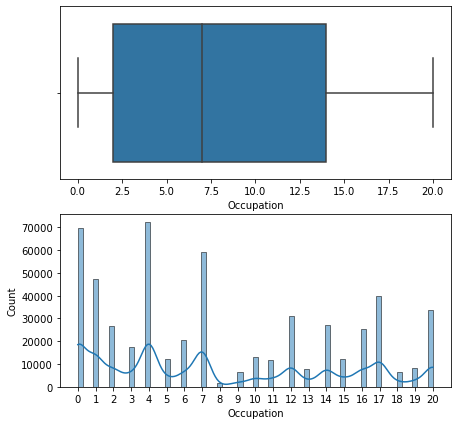

In [13]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=df,x = 'Occupation')
sns.histplot(ax=axes[1],data=df,x='Occupation',kde=True)
plt.xticks(np.arange(0,21))

plt.show()
    

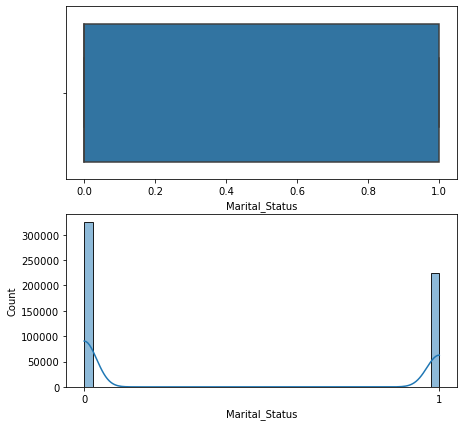

In [14]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=df,x = 'Marital_Status')
sns.histplot(ax=axes[1],data=df,x='Marital_Status',kde=True)
plt.xticks([0,1])


plt.show()


In [15]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

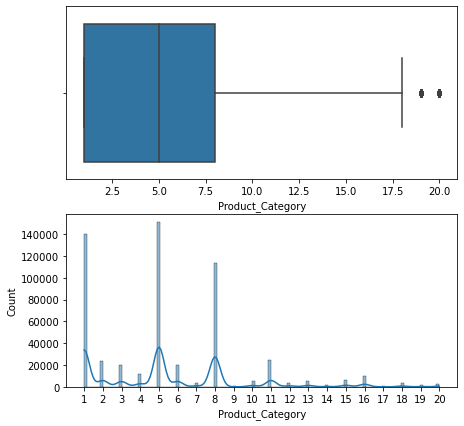

In [16]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=df,x = 'Product_Category')
sns.histplot(ax=axes[1],data=df,x='Product_Category',kde=True)
plt.xticks(np.arange(1,21))

plt.show()

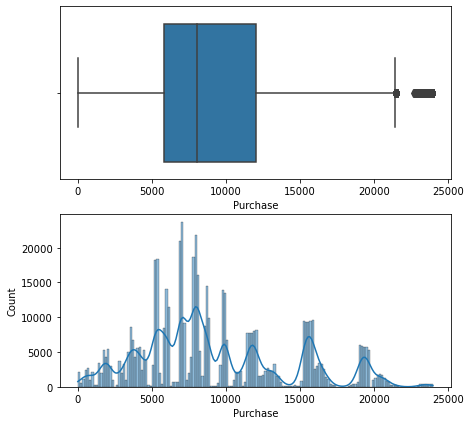

In [17]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=df,x = 'Purchase')
sns.histplot(ax=axes[1],data=df,x='Purchase',kde=True)
#plt.xticks(np.arange(0,21))

plt.show()

In [18]:
q = np.percentile(df['Purchase'].values,[25,75])
iqr = q[1]-q[0]
max_whisker = q[1]+(1.5*iqr)
max_whisker

21400.5

Purchase of amount greater than 21400.5 are outliers means rare, very less purchases are made of such high amount

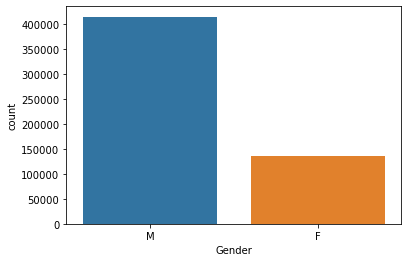

In [19]:
sns.countplot(x = 'Gender', data = df, order=df['Gender'].value_counts().index)
plt.show()

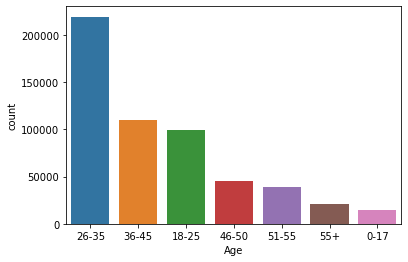

In [20]:
sns.countplot(x = 'Age', data = df, order=df['Age'].value_counts().index)
plt.show()

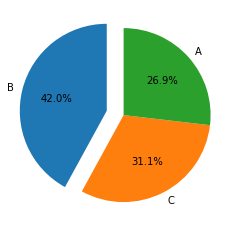

In [21]:
plt.pie(df['City_Category'].value_counts().values,
       labels=df['City_Category'].value_counts().index,
        autopct='%1.1f%%',
       startangle=90,
       explode=(0.2,0,0))
plt.show()

City_category wise proportion of purchases: B constitutes 42%, C constitutes 31.1%, A constitutes 26.9%

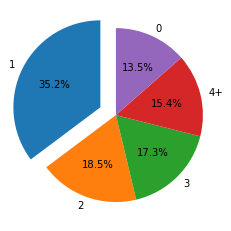

In [22]:
plt.pie(df['Stay_In_Current_City_Years'].value_counts().values,
       labels=df['Stay_In_Current_City_Years'].value_counts().index,
        autopct='%1.1f%%',
       startangle=90,
       explode=(0.2,0,0,0,0))
plt.show()

Stay_In_Current_City_Years wise proportion of purchases: 1 constitutes 35.2%, 2 constitutes 18.5%, 3 constitutes 17.3%, 4+ constitutes 15.4%, 0 constitutes 13.5%

In [23]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

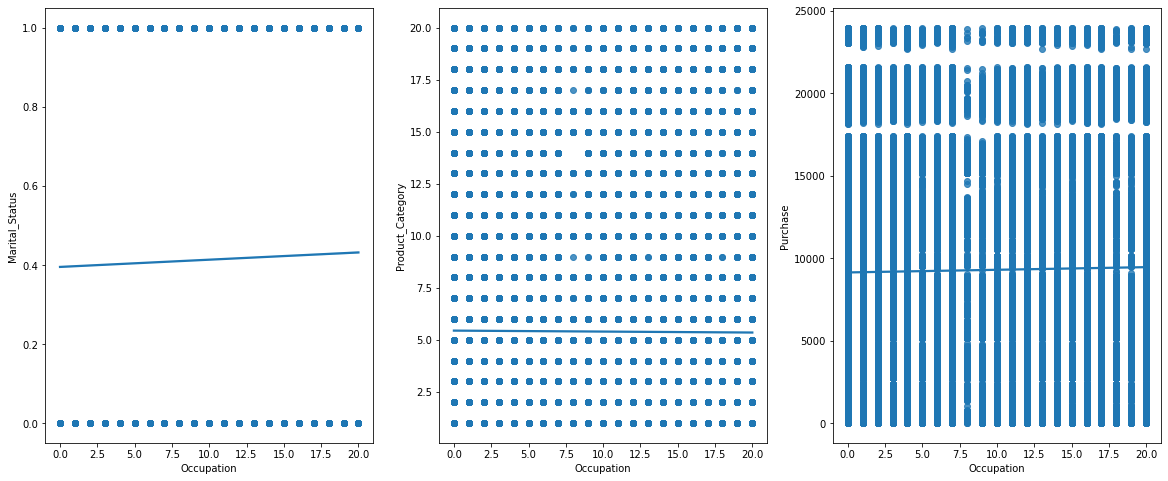

In [24]:
figure,axes=plt.subplots(1,3,figsize=(20,8))
sns.regplot(data=df,x='Occupation',y='Marital_Status',ax=axes[0])
sns.regplot(data=df,x='Occupation',y='Product_Category',ax=axes[1])
sns.regplot(data=df,x='Occupation',y='Purchase',ax=axes[2])

plt.show()

1. As occupation increases number of married users increase very slightly means users of high occupation are mostly married
2. Occupation and Product_Category show no correlation, means purchase of product of any product_category is independent of user's occupation, anyone can buy product of any product_category
3. Occupation and Purchase are slightly correlated, as we can see occupation increases purchase increases very slightly means as compare to users of low occupation users with high occupation make purchases of slight more amount

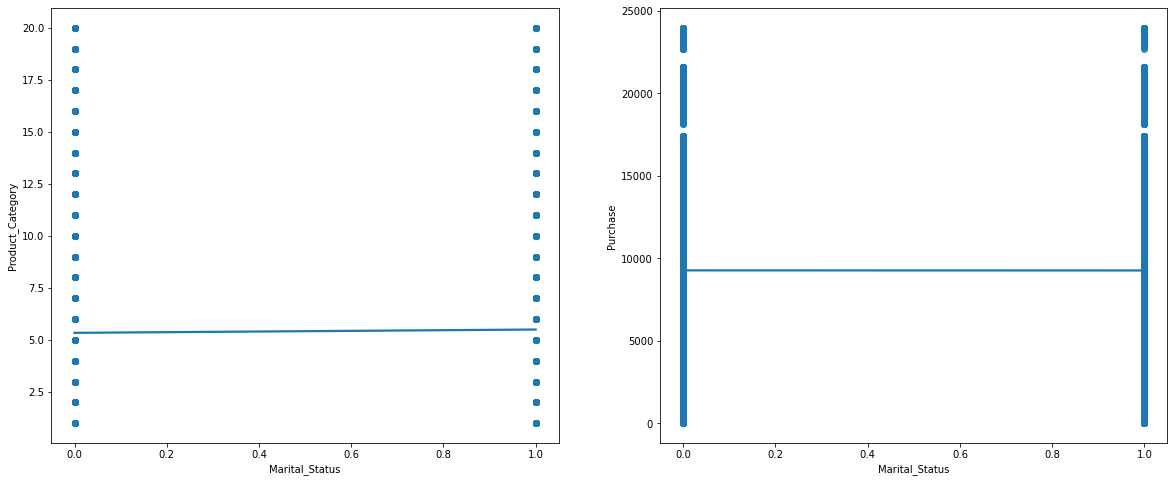

In [25]:
figure,axes=plt.subplots(1,2,figsize=(20,8))
sns.regplot(data=df,x='Marital_Status',y='Product_Category',ax=axes[0])
sns.regplot(data=df,x='Marital_Status',y='Purchase',ax=axes[1])

plt.show()

As we can see Product_Category and Purchase both are independent of Marital_Status 

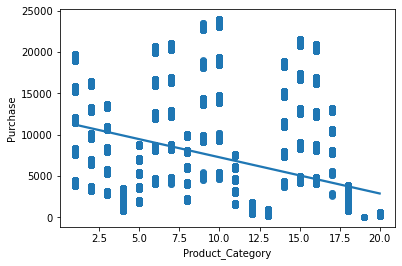

In [26]:
sns.regplot(data=df,x='Product_Category',y='Purchase')


plt.show()

Purchase and Product_Category is moderately negative correlated means as product category increases purchase reduces, users tend to buy product of lower product_category more as compare to higher product_category products

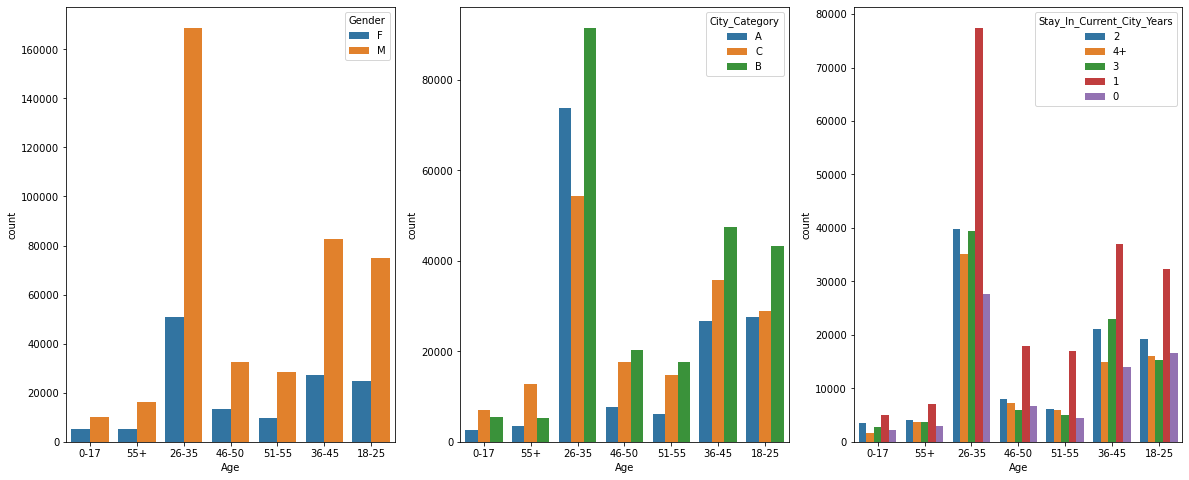

In [27]:
figure,axes=plt.subplots(1,3,figsize=(20,8))
sns.countplot(x='Age',hue='Gender',data=df,ax=axes[0])
sns.countplot(x='Age',hue='City_Category',data=df,ax=axes[1])
sns.countplot(x='Age',hue='Stay_In_Current_City_Years',data=df,ax=axes[2])

plt.show()


1. Male of every age group made more purchases as compared to females. Males of age group 26-35 made most purchases
2. Users of City_category = B of most age groups made most purchases but for age groups 0-17 and 55+ most purchases are made by users of city_category = C. Most users of city_category = B are of 26-35 age group
3. Users of stay_in_current_city_years = 1 of every age groups made most purchases. Most users of stay_in_current_city_years = 1 are of 26-35 age group

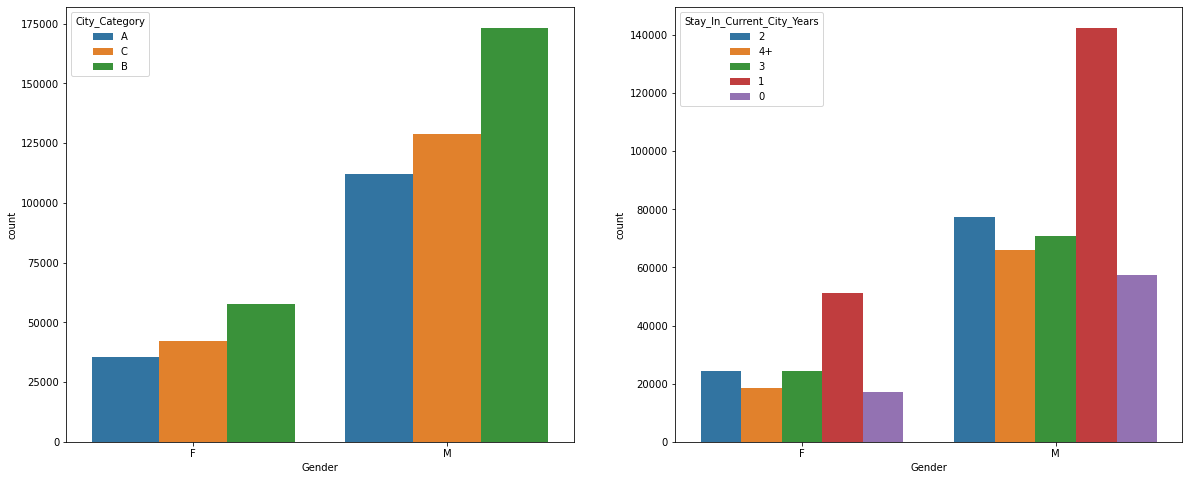

In [28]:
figure,axes=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x='Gender',hue='City_Category',data=df,ax=axes[0])
sns.countplot(x='Gender',hue='Stay_In_Current_City_Years',data=df,ax=axes[1])

plt.show()


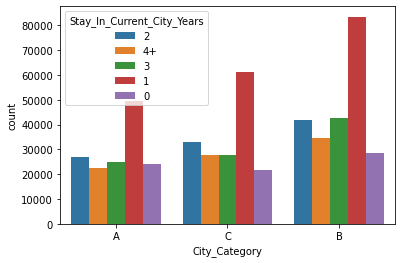

In [29]:
sns.countplot(x='City_Category',hue='Stay_In_Current_City_Years',data=df)

plt.show()

In each city_category major purchases are done by users who stay_in_current_city for about 1 year

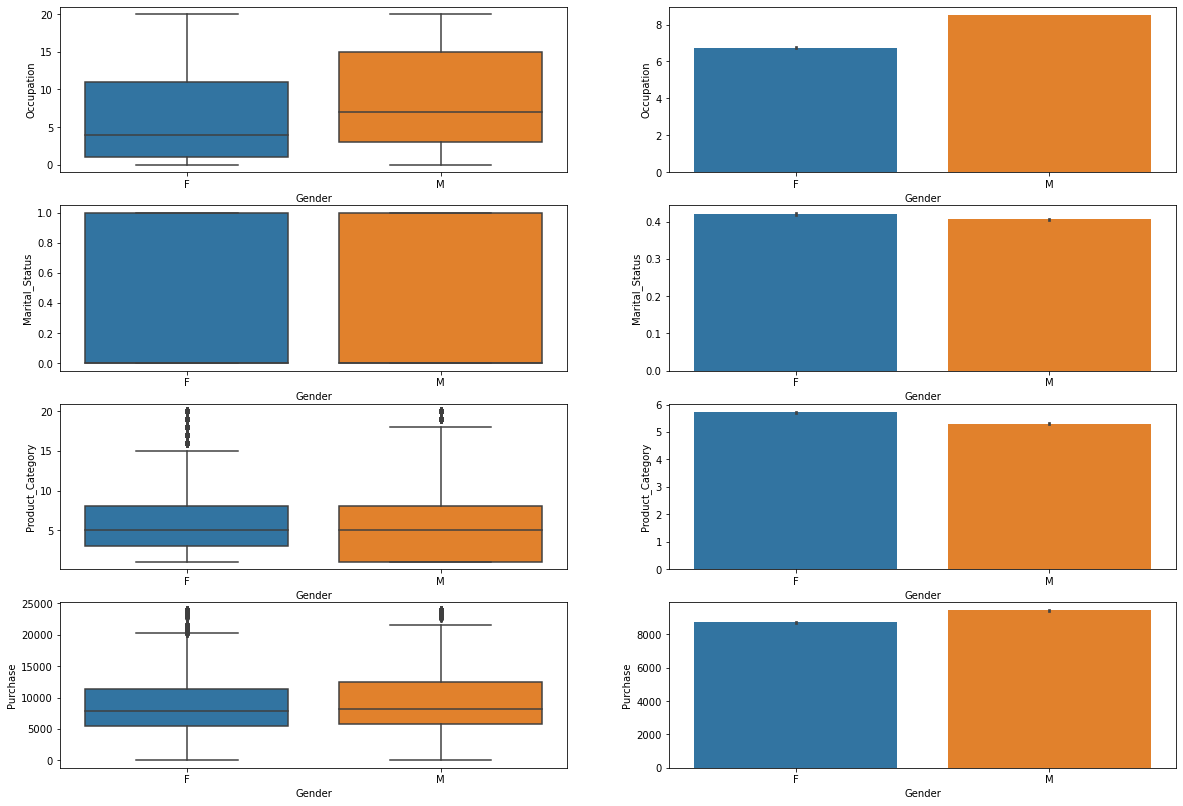

In [30]:
figure,axes=plt.subplots(4,2,figsize=(20,14))

sns.boxplot(x='Gender', y='Occupation', data=df,ax=axes[0][0])
sns.barplot(data=df, x="Gender", y="Occupation", estimator=np.mean,ax=axes[0][1])

sns.boxplot(x='Gender', y='Marital_Status', data=df,ax=axes[1][0])
sns.barplot(data=df, x="Gender", y="Marital_Status", estimator=np.mean,ax=axes[1][1])

sns.boxplot(x='Gender', y='Product_Category', data=df,ax=axes[2][0])
sns.barplot(data=df, x="Gender", y="Product_Category", estimator=np.mean,ax=axes[2][1])

sns.boxplot(x='Gender', y='Purchase', data=df,ax=axes[3][0])
sns.barplot(data=df, x="Gender", y="Purchase", estimator=np.mean,ax=axes[3][1])

plt.show()

1. Male users are generally of higher occupation than female users who had made purchases on black friday sale
2. Married female users are slightly more than married male users who had made purchases on black friday sale
3. Mostly male users tend to buy product of lower product_category than female users
4. Male users had made most purchases with amount range more than female users

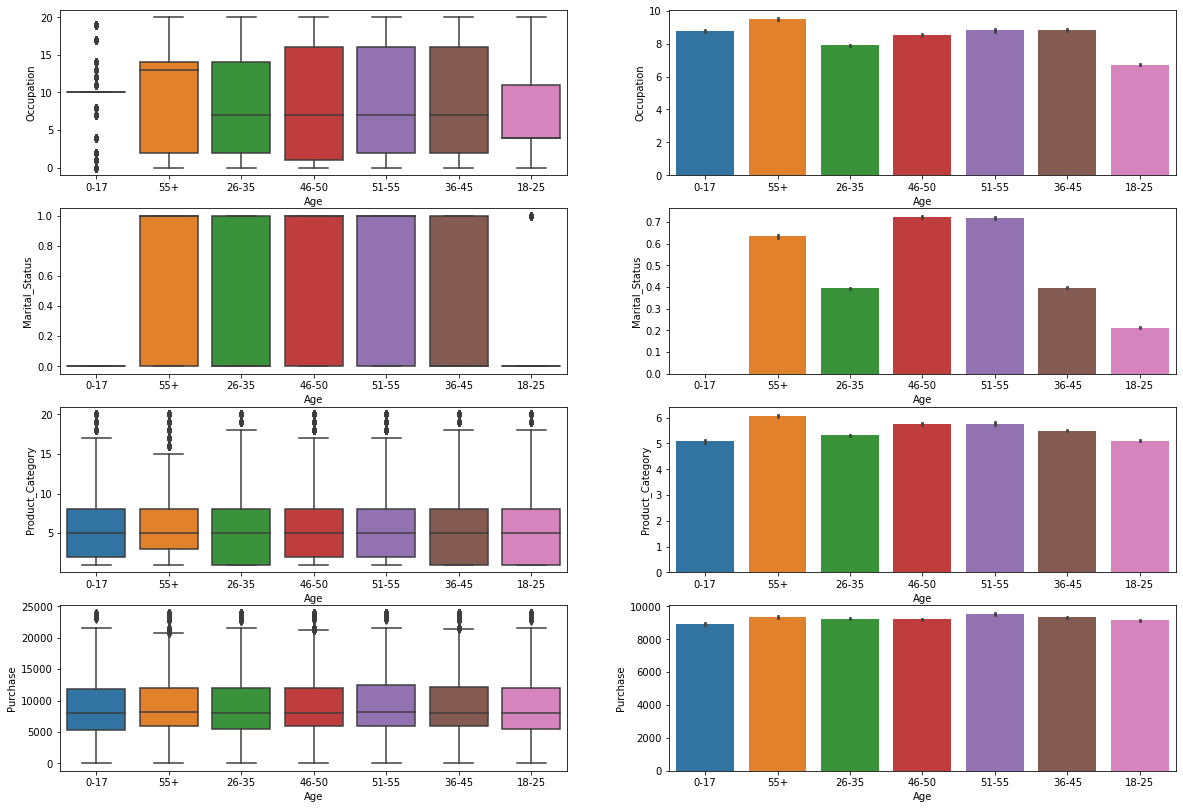

In [31]:
figure,axes=plt.subplots(4,2,figsize=(20,14))

sns.boxplot(x='Age', y='Occupation', data=df,ax=axes[0][0])
sns.barplot(data=df, x="Age", y="Occupation", estimator=np.mean,ax=axes[0][1])

sns.boxplot(x='Age', y='Marital_Status', data=df,ax=axes[1][0])
sns.barplot(data=df, x="Age", y="Marital_Status", estimator=np.mean,ax=axes[1][1])

sns.boxplot(x='Age', y='Product_Category', data=df,ax=axes[2][0])
sns.barplot(data=df, x="Age", y="Product_Category", estimator=np.mean,ax=axes[2][1])

sns.boxplot(x='Age', y='Purchase', data=df,ax=axes[3][0])
sns.barplot(data=df, x="Age", y="Purchase", estimator=np.mean,ax=axes[3][1])

plt.show()

1. Users of higher age category has higher occupation as compare to users of lower age group
2. Mostly Users of higher age group are married as compare to unmarried
3. Users of higher age group purchases higher product_category products more as compare to lower product_category products
4. Purchase is kind of independent of age just slight increase in purchase as age increases

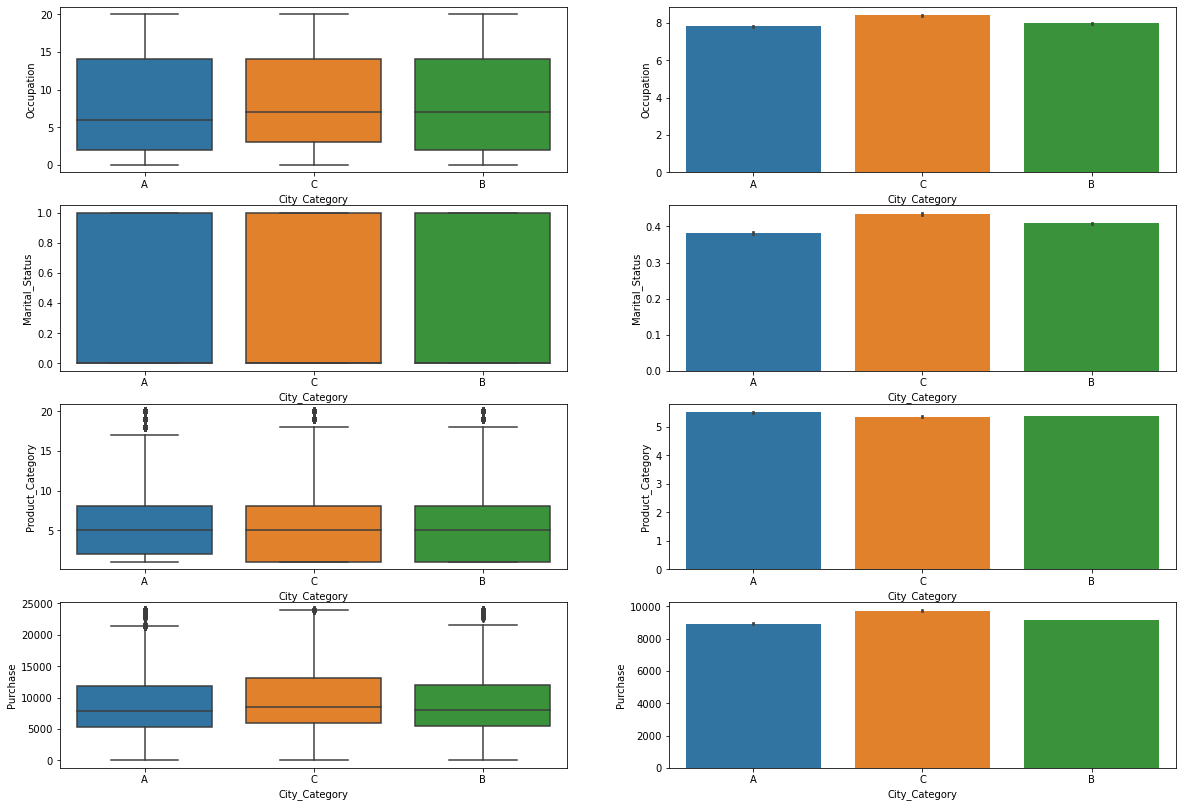

In [32]:
figure,axes=plt.subplots(4,2,figsize=(20,14))

sns.boxplot(x='City_Category', y='Occupation', data=df,ax=axes[0][0])
sns.barplot(data=df, x="City_Category", y="Occupation", estimator=np.mean,ax=axes[0][1])

sns.boxplot(x='City_Category', y='Marital_Status', data=df,ax=axes[1][0])
sns.barplot(data=df, x="City_Category", y="Marital_Status", estimator=np.mean,ax=axes[1][1])

sns.boxplot(x='City_Category', y='Product_Category', data=df,ax=axes[2][0])
sns.barplot(data=df, x="City_Category", y="Product_Category", estimator=np.mean,ax=axes[2][1])

sns.boxplot(x='City_Category', y='Purchase', data=df,ax=axes[3][0])
sns.barplot(data=df, x="City_Category", y="Purchase", estimator=np.mean,ax=axes[3][1])

plt.show()

1. Users of city_category = C are slightly of higher occupation as compare to other city_category users
2. Married Users of city_category = C are slightly more as compare to other city_category 
3. Product_Category is independent of city_category means various product_category products are diversed in each city_category
4. Users of city_category = C made slightly higher purchases as compare to other city_category users

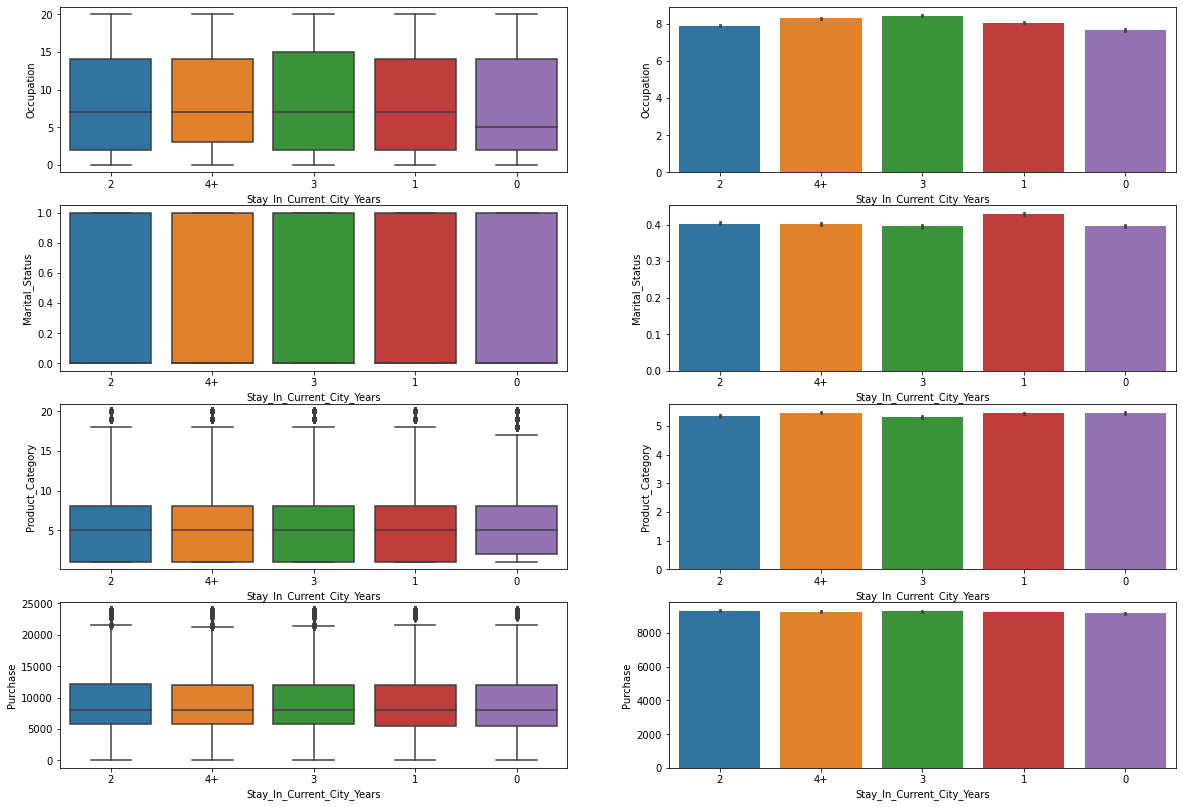

In [33]:
figure,axes=plt.subplots(4,2,figsize=(20,14))

sns.boxplot(x='Stay_In_Current_City_Years', y='Occupation', data=df,ax=axes[0][0])
sns.barplot(data=df, x="Stay_In_Current_City_Years", y="Occupation", estimator=np.mean,ax=axes[0][1])

sns.boxplot(x='Stay_In_Current_City_Years', y='Marital_Status', data=df,ax=axes[1][0])
sns.barplot(data=df, x="Stay_In_Current_City_Years", y="Marital_Status", estimator=np.mean,ax=axes[1][1])

sns.boxplot(x='Stay_In_Current_City_Years', y='Product_Category', data=df,ax=axes[2][0])
sns.barplot(data=df, x="Stay_In_Current_City_Years", y="Product_Category", estimator=np.mean,ax=axes[2][1])

sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=df,ax=axes[3][0])
sns.barplot(data=df, x="Stay_In_Current_City_Years", y="Purchase", estimator=np.mean,ax=axes[3][1])

plt.show()

1. Users who stayed in current city for about 3 years are with slightly higher occupation
2. Users who stayed in current city for about 1 year are generally married rather than unmarried and also slightly higher as compare to others
3. Product_Category and Stay_in_current_years are kind of independent, the products of various category are well diversed among different stay of years
4. Purchase and Stay_in_current_years are kind of independent, the users with equivalent amount of purchases are well diversed among different stay of years

In [34]:
df_copy = df.copy()
df_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [35]:
df_copy['Product_ID_num'] = df_copy['Product_ID'].replace(df_copy['Product_ID'].unique(),np.arange(0,3631))
df_copy['Gender_num'] = df_copy['Gender'].replace(df_copy['Gender'].unique(),np.arange(0,2))
df_copy['Age_num'] = df_copy['Age'].replace(df_copy['Age'].unique(),np.arange(0,7))
df_copy['City_Category_num'] = df_copy['City_Category'].replace(df_copy['City_Category'].unique(),np.arange(0,3))
df_copy['Stay_In_Current_City_Years_num'] = df_copy['Stay_In_Current_City_Years'].replace(df_copy['Stay_In_Current_City_Years'].unique(),np.arange(0,5))

df_copy.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Product_ID_num,Gender_num,Age_num,City_Category_num,Stay_In_Current_City_Years_num
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,0,0,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1,0,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,2,0,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,3,0,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,4,1,1,1,1


we have converted all categorical columns to numerical so that we can find correlation among different columns or attributes of data

In [36]:
df_copy.corr()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase,Product_ID_num,Gender_num,Age_num,City_Category_num,Stay_In_Current_City_Years_num
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716,0.006914,-0.033474,-0.038360,0.028514,0.004834
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833,-0.004188,0.117291,-0.040858,0.005470,-0.010470
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463,0.013193,-0.011603,-0.078776,0.016846,0.010461
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703,0.294232,-0.045594,-0.012546,-0.012204,0.006825
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000,-0.249081,0.060346,0.002344,0.011513,-0.007504
Product_ID_num,0.006914,-0.004188,0.013193,0.294232,-0.249081,1.000000,-0.016938,-0.006908,-0.013383,0.007775
Gender_num,-0.033474,0.117291,-0.011603,-0.045594,0.060346,-0.016938,1.000000,-0.000777,-0.007688,-0.015108
Age_num,-0.038360,-0.040858,-0.078776,-0.012546,0.002344,-0.006908,-0.000777,1.000000,0.042006,0.007013
City_Category_num,0.028514,0.005470,0.016846,-0.012204,0.011513,-0.013383,-0.007688,0.042006,1.000000,-0.011205
Stay_In_Current_City_Years_num,0.004834,-0.010470,0.010461,0.006825,-0.007504,0.007775,-0.015108,0.007013,-0.011205,1.000000


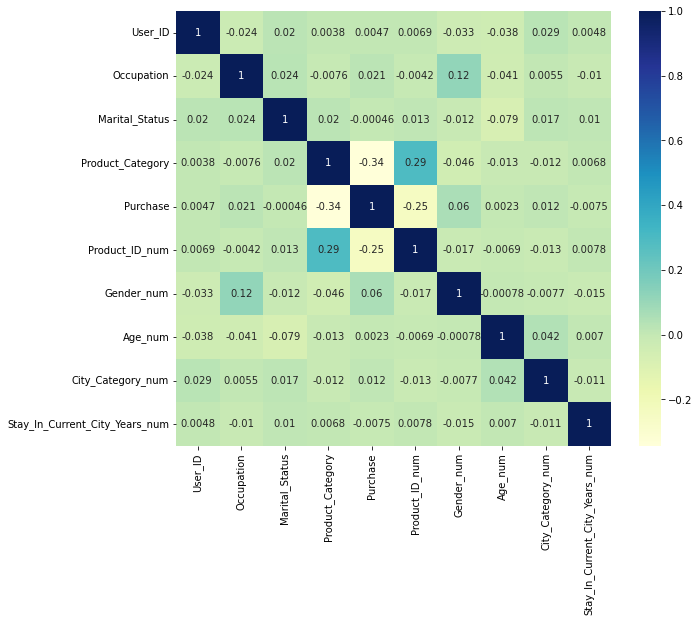

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df_copy.corr(),annot=True,square=True,cmap='YlGnBu')
plt.show()

we can see that there is no such two columns apart from themselves which are highly correlated but there are few pairs of columns which are moderately or weakly correlated  
 
1. (Product_Category, Purchase,Product_ID) which is negatively correlated which illustrates as product_category increases purchase decreases,
2. (Product_Category, Product_ID) which is positively correlated which shows as product_category increases product_id also increases,
3. (Occupation, Gender) are positively correlated which means as occupation increases gender increases from female to male. Males are generally more with higher occupation

In [38]:
g_purchase = df.groupby(['Gender']).agg({'Purchase':['mean','std']})
g_purchase

Purchase             
               mean          std
Gender                          
F       8734.565765  4767.233289
M       9437.526040  5092.186210

here we are getting gender wise average purchase and standard deviation, we see Male average purchase is more than female which is for this sample but we can't say it for population so, therefore we will make inference for the population by using CLT theorem and Confidence Interval

In [39]:
g_purchase.loc['M','Purchase']

mean    9437.52604
std     5092.18621
Name: M, dtype: float64

In [40]:
df['Purchase'].std()

5023.065393820627

In [41]:
m,f = [],[]
for i in range(1000):
    s = df.groupby(['Gender']).sample(n=10,replace=True)
    avg_purchase = s.groupby(['Gender']).agg({'Purchase':'mean'})
    #print(avg_purchase)
    m.append(avg_purchase.loc['M','Purchase'])
    f.append(avg_purchase.loc['F','Purchase'])


done sampling by taking this sample dataset as population and if this dataset is sample of population it follows CLT which states that sample follows gaussian distribution, mean for sample and population is similar and standard deviation for sample(standard error) is equal to standard deviation of population divided by square root of sample size

1. here we have done sampling for 1000 times with different sample size and record average values for sample for different genders 

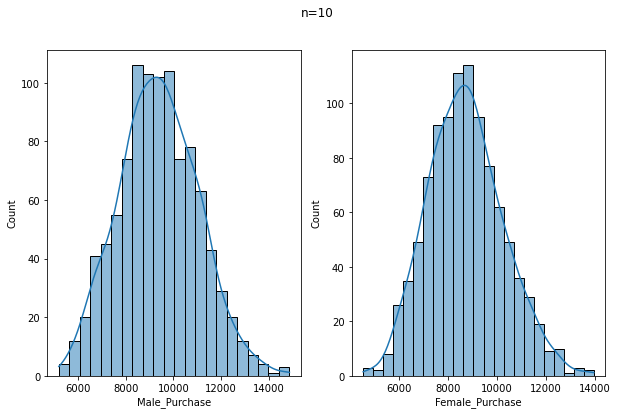

(9381.7935, 8723.704200000002)

In [42]:
figure,axes = plt.subplots(1,2,figsize=(10,6))
sns.histplot(x=m,kde=True,ax=axes[0],label='Male')
axes[0].set_xlabel('Male_Purchase')
sns.histplot(x=f,kde=True,ax=axes[1],label='Female')
axes[1].set_xlabel('Female_Purchase')
plt.suptitle('n=10')
plt.show()
np.mean(m),np.mean(f)


In [43]:
m,f = [],[]
for i in range(1000):
    s = df.groupby(['Gender']).sample(n=100,replace=True)
    avg_purchase = s.groupby(['Gender']).agg({'Purchase':'mean'})
    #print(avg_purchase)
    m.append(avg_purchase.loc['M','Purchase'])
    f.append(avg_purchase.loc['F','Purchase'])


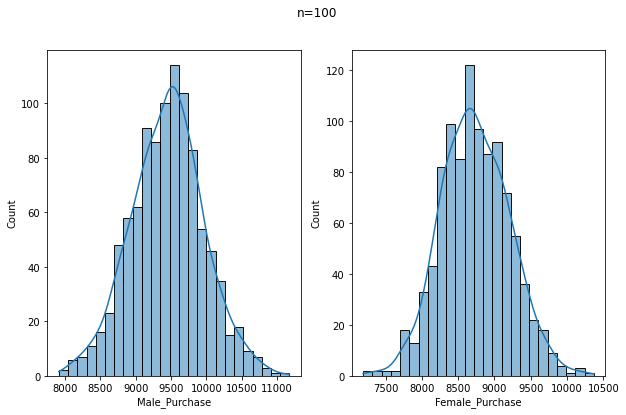

(9449.72676, 8735.65637)

In [44]:
figure,axes = plt.subplots(1,2,figsize=(10,6))
sns.histplot(x=m,kde=True,ax=axes[0],label='Male')
axes[0].set_xlabel('Male_Purchase')
sns.histplot(x=f,kde=True,ax=axes[1],label='Female')
axes[1].set_xlabel('Female_Purchase')
plt.suptitle('n=100')
plt.show()
np.mean(m),np.mean(f)

In [45]:
m,f = [],[]
for i in range(1000):
    s = df.groupby(['Gender']).sample(n=1000,replace=True)
    avg_purchase = s.groupby(['Gender']).agg({'Purchase':'mean'})
    #print(avg_purchase)
    m.append(avg_purchase.loc['M','Purchase'])
    f.append(avg_purchase.loc['F','Purchase'])
    
    

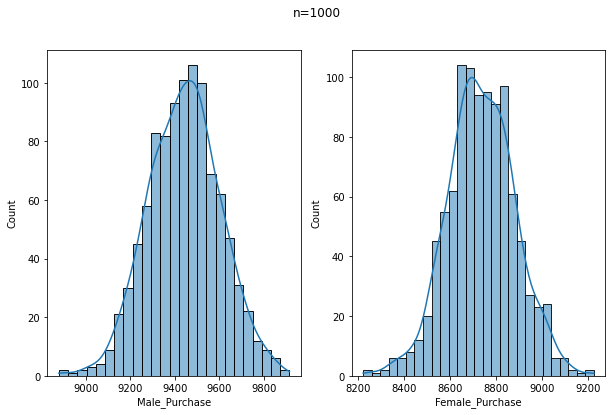

In [46]:
figure,axes = plt.subplots(1,2,figsize=(10,6))
sns.histplot(x=m,kde=True,ax=axes[0],label='Male')
axes[0].set_xlabel('Male_Purchase')
sns.histplot(x=f,kde=True,ax=axes[1],label='Female')
axes[1].set_xlabel('Female_Purchase')
plt.suptitle('n=1000')
plt.show()

In [47]:
np.mean(m),np.mean(f)

(9442.421671, 8737.680814)

In [48]:
np.std(m),np.std(f)

(161.03485632415348, 145.85254493651252)

In [49]:
np.percentile(m,[2.5,97.5]),np.percentile(f,[2.5,97.5])

(array([9133.750025, 9762.72865 ]), array([8448.430575, 9028.212225]))

In [50]:
m,f = [],[]
for i in range(1000):
    s = df.groupby(['Gender']).sample(n=10000,replace=True)
    avg_purchase = s.groupby(['Gender']).agg({'Purchase':'mean'})
    #print(avg_purchase)
    m.append(avg_purchase.loc['M','Purchase'])
    f.append(avg_purchase.loc['F','Purchase'])
    

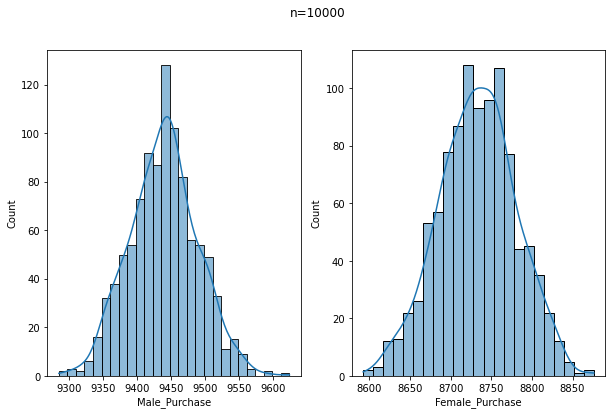

(9438.8411681, 8732.9369189)

In [51]:
figure,axes = plt.subplots(1,2,figsize=(10,6))
sns.histplot(x=m,kde=True,ax=axes[0],label='Male')
axes[0].set_xlabel('Male_Purchase')
sns.histplot(x=f,kde=True,ax=axes[1],label='Female')
axes[1].set_xlabel('Female_Purchase')
plt.suptitle('n=10000')
plt.show()
np.mean(m),np.mean(f)

In [52]:
np.std(m),np.std(f)

(49.807638901706554, 47.2108583582465)

In [53]:

np.percentile(m,[.5,99.5]),np.percentile(f,[.5,99.5])

(array([9316.364339 , 9566.3098385]), array([8619.6708485, 8839.8328165]))

1. mean for sample size = 10000 is the closest to dataset mean and std for sample for male and female are (51.16585344245522, 47.77914536999324) which also very close to theortical standard error(ex: 5092/(10000)**0.5)
2. By checking the means we are 99% confidence that average purchase for male are higher than female and the interval in which male and female average purchase for population lies are [9312.525719, 9558.717394] and [8620.9205625, 8867.1848005]

In [54]:
marital_purchase = df.groupby(['Marital_Status']).agg({'Purchase':['mean','std']})
marital_purchase

Purchase             
                       mean          std
Marital_Status                          
0               9265.907619  5027.347859
1               9261.174574  5016.897378

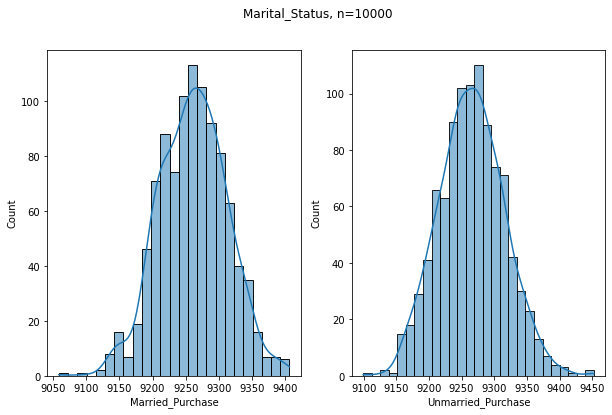

(9260.940994100001, 9265.6003616)

In [55]:
marr,unmarr = [],[]
for i in range(1000):
    s = df.groupby(['Marital_Status']).sample(n=10000,replace=True)
    avg_purchase = s.groupby(['Marital_Status']).agg({'Purchase':'mean'})
    #print(avg_purchase)
    marr.append(avg_purchase.loc[1,'Purchase'])
    unmarr.append(avg_purchase.loc[0,'Purchase'])
    
    
figure,axes = plt.subplots(1,2,figsize=(10,6))
sns.histplot(x=marr,kde=True,ax=axes[0])
axes[0].set_xlabel('Married_Purchase')
sns.histplot(x=unmarr,kde=True,ax=axes[1])
axes[1].set_xlabel('Unmarried_Purchase')
plt.suptitle('Marital_Status, n=10000')
plt.show()
np.mean(marr),np.mean(unmarr)

In [56]:
np.std(marr),np.std(unmarr)

(51.02087435638783, 49.863583229029864)

In [57]:
np.percentile(marr,[5,95]),np.percentile(unmarr,[5,95])

(array([9182.44304, 9342.08196]), array([9184.970785, 9348.944635]))

1. mean for sample size = 10000 is the closest to dataset mean and std for sample for male and female are (51.11883203721188, 50.97484943691865) which also very close to theortical standard error(ex: 5027/(10000)**0.5)
2. By checking the means we have checked upto 90% confidence but the intervals for married and unmarried average purchases are overlapping so, we can't say that anyone has higher average purchase than other but inference average purchase for population as per marital_status are [9178.82424 , 9346.881175] and [9180.185615, 9345.446275]

In [58]:
age_purchase = df.groupby(['Age']).agg({'Purchase':['mean','std']})
age_purchase

Purchase             
              mean          std
Age                            
0-17   8933.464640  5111.114046
18-25  9169.663606  5034.321997
26-35  9252.690633  5010.527303
36-45  9331.350695  5022.923879
46-50  9208.625697  4967.216367
51-55  9534.808031  5087.368080
55+    9336.280459  5011.493996

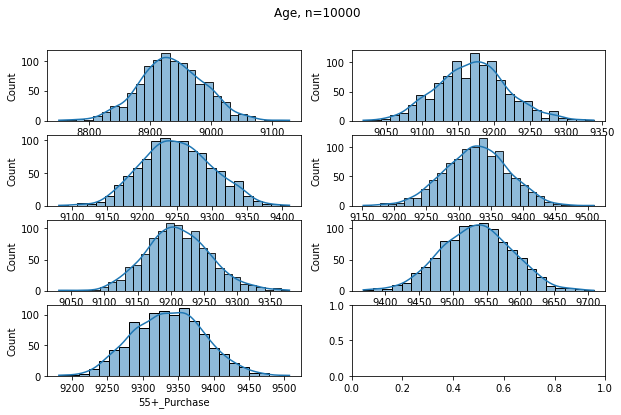

(8935.3680282,
 9170.2798024,
 9249.980372,
 9327.6080768,
 9210.639383099999,
 9535.1803637,
 9336.8303633)

In [59]:
a0_17, a18_25, a26_35, a36_45, a46_50, a51_55, a55_ = [],[],[],[],[],[],[]
for i in range(1000):
    s = df.groupby(['Age']).sample(n=10000,replace=True)
    avg_purchase = s.groupby(['Age']).agg({'Purchase':'mean'})
    #print(avg_purchase)
    a0_17.append(avg_purchase.iloc[0,0])
    a18_25.append(avg_purchase.iloc[1,0])
    a26_35.append(avg_purchase.iloc[2,0])
    a36_45.append(avg_purchase.iloc[3,0])
    a46_50.append(avg_purchase.iloc[4,0])
    a51_55.append(avg_purchase.iloc[5,0])
    a55_.append(avg_purchase.iloc[6,0])
    
figure,axes = plt.subplots(4,2,figsize=(10,6))

sns.histplot(x=a0_17,kde=True,ax=axes[0][0])
axes[0][0].set_xlabel('0-17_Purchase')
sns.histplot(x=a18_25,kde=True,ax=axes[0][1])
axes[0][1].set_xlabel('18-25_Purchase')
sns.histplot(x=a26_35,kde=True,ax=axes[1][0])
axes[1][0].set_xlabel('26-35_Purchase')
sns.histplot(x=a36_45,kde=True,ax=axes[1][1])
axes[1][1].set_xlabel('36-45_Purchase')
sns.histplot(x=a46_50,kde=True,ax=axes[2][0])
axes[2][0].set_xlabel('46-50_Purchase')
sns.histplot(x=a51_55,kde=True,ax=axes[2][1])
axes[2][1].set_xlabel('51-55_Purchase')
sns.histplot(x=a55_,kde=True,ax=axes[3][0])
axes[3][0].set_xlabel('55+_Purchase')


plt.suptitle('Age, n=10000')
plt.show()
np.mean(a0_17),np.mean(a18_25),np.mean(a26_35),np.mean(a36_45),np.mean(a46_50),np.mean(a51_55),np.mean(a55_)

In [60]:
np.percentile(a0_17,[5,95]),np.percentile(a18_25,[5,95]),np.percentile(a26_35,[5,95]),np.percentile(a36_45,[5,95]),np.percentile(a46_50,[5,95]),np.percentile(a51_55,[5,95]),np.percentile(a55_,[5,95])

(array([8847.14919, 9019.93087]),
 array([9091.687015, 9251.937055]),
 array([9170.204305, 9336.347105]),
 array([9247.161225, 9408.04921 ]),
 array([9134.056785, 9295.001895]),
 array([9449.448615, 9620.319625]),
 array([9254.18907 , 9419.839885]))

In [61]:
np.std(a0_17),np.std(a18_25),np.std(a26_35),np.std(a36_45),np.std(a46_50),np.std(a51_55),np.std(a55_)

(52.607882863498375,
 48.95259249868114,
 50.04125213757523,
 49.62498459820198,
 48.81957342138487,
 52.437176084255086,
 50.2088033374398)

1. mean for sample size = 10000 is the closest to dataset mean and std for sample for all age groups are 
(50.57991322318957,
 49.864140916834934,
 49.62444928174692,
 50.65835825611308,
 49.94034365663502,
 50.529486096269125,
 49.25246794346217) which also very close to theortical standard error(ex: 5111/(10000)**0.5)
2. By checking the means we have checked upto 90% confidence but the intervals for most age groups are overlapping so, we can't say confidently about the order of age group that has higher average purchase than other but we can say about some that age group 51-55 users average purchase is the highest among all and age group 0-17 users have the lowest average purchase which we can 99% confidently inference average purchase for population as per age group are [9254.532645, 9415.820565] and [8847.057755, 9016.028485]

so major insights were only for this sample of data which we have in form of dataset, we can't inference all insights for population as well but the last 3 insights by doing sampling, clt and ci we can inference for the population as well

# Recommendation

1. Apart from Black Friday Sale's offer, introduce more exciting offers for female such that they tends to buy more which would increase their average purchase and also for males introduce some little exciting offers so that they also tends to buy more and their average purchase also increases 

2. Could also introduce some separate offers for marries and unmarried users so that they became more excited to make purchase 

3. For age group 0-17 introduce such offers that their parents as well as they also likes which allows them to make more purchases so, their average purchase also increases. For different age groups introduce different relaxations and offers according to age so that at whole all of them's average purchase increases\

(These are the recommendation for all the population)

Based on these dataset

1. We have so many insights so according to all if they tends to stay true for population as well then introduce different offers to imursify their experience of purchasing 